In [6]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io,color
from skimage.util import img_as_ubyte

#1. Loading and displaying the original Image

In [19]:
image=io.imread("download.jpg")

In [20]:
image.shape

(168, 300, 3)

In [21]:
image

array([[[114, 104, 103],
        [110, 100,  99],
        [109,  99,  98],
        ...,
        [ 44,  51,  61],
        [ 44,  51,  61],
        [ 44,  51,  61]],

       [[118, 108, 107],
        [115, 105, 104],
        [115, 105, 104],
        ...,
        [ 44,  51,  61],
        [ 44,  51,  61],
        [ 44,  51,  61]],

       [[116, 108, 106],
        [115, 107, 105],
        [116, 108, 106],
        ...,
        [ 45,  52,  62],
        [ 45,  52,  62],
        [ 45,  52,  62]],

       ...,

       [[ 44,  56,  72],
        [ 51,  63,  79],
        [ 54,  66,  82],
        ...,
        [ 37,  50,  66],
        [ 33,  46,  62],
        [ 28,  44,  59]],

       [[ 45,  57,  73],
        [ 47,  59,  75],
        [ 51,  63,  79],
        ...,
        [ 31,  44,  60],
        [ 28,  41,  57],
        [ 24,  40,  55]],

       [[ 46,  58,  74],
        [ 44,  56,  72],
        [ 49,  61,  77],
        ...,
        [ 29,  42,  58],
        [ 26,  39,  55],
        [ 21,  37,  52]]

#Converting the color image into grey scale image

In [23]:
gray_image=color.rgb2gray(image)

In [24]:
gray_image

array([[0.41589373, 0.40020745, 0.39628588, ..., 0.19699412, 0.19699412,
        0.19699412],
       [0.43158   , 0.41981529, 0.41981529, ..., 0.19699412, 0.19699412,
        0.19699412],
       [0.42963059, 0.42570902, 0.42963059, ..., 0.20091569, 0.20091569,
        0.20091569],
       ...,
       [0.21413176, 0.24158275, 0.25334745, ..., 0.18976902, 0.17408275,
        0.16345686],
       [0.21805333, 0.22589647, 0.24158275, ..., 0.16623961, 0.1544749 ,
        0.14777059],
       [0.2219749 , 0.21413176, 0.23373961, ..., 0.15839647, 0.14663176,
        0.13600588]])

In [25]:
gray_image.shape

(168, 300)

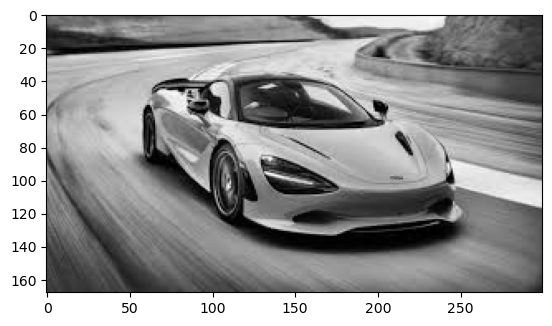

In [26]:
plt.imshow(gray_image,cmap="gray")

Text(0.5, 1.0, 'Original image')

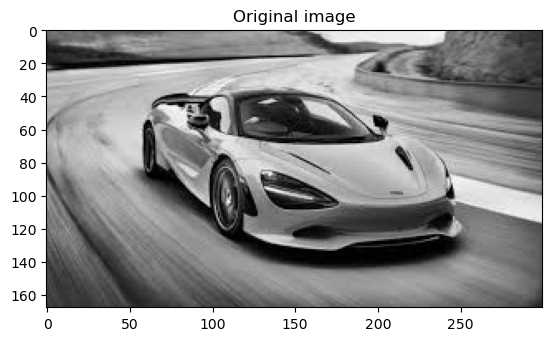

In [27]:
plt.imshow(gray_image,cmap="gray")
plt.title("Original image")

In [29]:
flatten_image=gray_image.reshape(gray_image.shape[0],-1)
flatten_image

array([[0.41589373, 0.40020745, 0.39628588, ..., 0.19699412, 0.19699412,
        0.19699412],
       [0.43158   , 0.41981529, 0.41981529, ..., 0.19699412, 0.19699412,
        0.19699412],
       [0.42963059, 0.42570902, 0.42963059, ..., 0.20091569, 0.20091569,
        0.20091569],
       ...,
       [0.21413176, 0.24158275, 0.25334745, ..., 0.18976902, 0.17408275,
        0.16345686],
       [0.21805333, 0.22589647, 0.24158275, ..., 0.16623961, 0.1544749 ,
        0.14777059],
       [0.2219749 , 0.21413176, 0.23373961, ..., 0.15839647, 0.14663176,
        0.13600588]])

#Creating pca object

In [45]:
pca=PCA(n_components=0.95)

In [46]:
transfomedimage=pca.fit_transform(gray_image)
transfomedimage

array([[-3.15675884,  0.9153932 , -1.64334201, ...,  0.19485119,
        -0.01563447, -0.06590069],
       [-3.01780684,  0.62139611, -1.5142055 , ...,  0.24367626,
         0.03589758,  0.1814444 ],
       [-2.91657177,  0.37180836, -1.2483587 , ...,  0.15583303,
         0.02326885,  0.15594315],
       ...,
       [ 1.28707566,  1.2345129 , -1.9152993 , ...,  0.16753294,
         0.07664783,  0.09647414],
       [ 1.52565039,  1.23239938, -1.85951516, ...,  0.15392906,
         0.08907513,  0.09082741],
       [ 1.70204264,  1.22345295, -1.82550306, ...,  0.16640449,
         0.09787843,  0.06850587]])

In [47]:
reconstructed_image=pca.inverse_transform(transfomedimage)

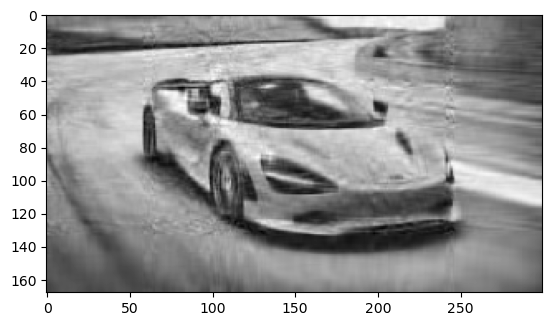

In [48]:
plt.imshow(reconstructed_image,cmap='gray')

In [53]:
#Normalizing the data

In [101]:
compressed_image_normalize=((reconstructed_image-reconstructed_image.min())/(reconstructed_image.max()-reconstructed_image.min()))

In [102]:
compressed_image_normalize

array([[0.46339121, 0.45160794, 0.44378387, ..., 0.29137648, 0.27692283,
        0.26343481],
       [0.52013345, 0.50034418, 0.47480505, ..., 0.30131638, 0.29182047,
        0.28232564],
       [0.52197994, 0.51325393, 0.49562663, ..., 0.29445935, 0.28636925,
        0.27820296],
       ...,
       [0.26814469, 0.26527115, 0.26937892, ..., 0.31882554, 0.30903599,
        0.3005354 ],
       [0.26195033, 0.26399458, 0.26901087, ..., 0.30249081, 0.29362828,
        0.2860991 ],
       [0.25614304, 0.26155868, 0.26900375, ..., 0.29738894, 0.28921968,
        0.28245447]])

In [103]:
convert_image_byte = img_as_ubyte(compressed_image_normalize)
convert_image_byte

array([[118, 115, 113, ...,  74,  71,  67],
       [133, 128, 121, ...,  77,  74,  72],
       [133, 131, 126, ...,  75,  73,  71],
       ...,
       [ 68,  68,  69, ...,  81,  79,  77],
       [ 67,  67,  69, ...,  77,  75,  73],
       [ 65,  67,  69, ...,  76,  74,  72]], dtype=uint8)

In [104]:
io.imsave('new_image.jpg',convert_image_byte)